In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os
from glob import glob
%matplotlib inline 

In [2]:
path = '../MURA-v1.1'
train_image_paths_csv = "train_image_paths.csv"
train_images_paths = pd.read_csv(os.path.join(path,train_image_paths_csv),dtype=str,header=None)
train_images_paths.columns = ['image_path']

In [3]:
train_images_paths['label'] = train_images_paths['image_path'].map(lambda x:'positive' if 'positive' in x else 'negative')
train_images_paths['category'] = train_images_paths['image_path'].apply(lambda x: x.split('/')[2])  
train_images_paths['patientId'] = train_images_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))

## 1. Knowing the data

In [4]:
train_images_paths.head()

,image_path,label,category,patientId
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,XR_SHOULDER,00001
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,XR_SHOULDER,00001
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,XR_SHOULDER,00001
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive,XR_SHOULDER,00002
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive,XR_SHOULDER,00002


In [5]:
total_number_of_training_images = np.shape(train_images_paths)[0]
print("total number of images:",total_number_of_training_images )
print("\ndata_shape:",np.shape(train_images_paths))
print ("\n\nnumber of null values", train_images_paths.isnull().sum())



categories_counts = pd.DataFrame(train_images_paths['category'].value_counts())
print ('\n\ncategories:\n',categories_counts )
print('\n\nnumber of patients:',train_images_paths['patientId'].nunique())
print('\n\nnumber of labels:',train_images_paths['label'].nunique())
print ('\n\npositive casses:',len(train_images_paths[train_images_paths['label']=='positive']))
print ('\n\nnegative casses:',len(train_images_paths[train_images_paths['label']=='negative']))

total number of images: 36808

data_shape: (36808, 4)


number of null values image_path    0
label         0
category      0
patientId     0
dtype: int64


categories:
              category
XR_WRIST         9752
XR_SHOULDER      8379
XR_HAND          5543
XR_FINGER        5106
XR_ELBOW         4931
XR_FOREARM       1825
XR_HUMERUS       1272


number of patients: 11184


number of labels: 2


positive casses: 14873


negative casses: 21935


In [6]:
valid_image_paths_csv = "valid_image_paths.csv"
valid_data_paths = pd.read_csv(os.path.join(path,valid_image_paths_csv),dtype=str,header=None)
valid_data_paths.columns = ['image_path']

In [7]:
valid_data_paths['label'] = valid_data_paths['image_path'].map(lambda x:'positive' if 'positive' in x else 'negative')
valid_data_paths['category']  = valid_data_paths['image_path'].apply(lambda x: x.split('/')[2])  
valid_data_paths['dir'] =  valid_data_paths['image_path'].apply(lambda x: x.split('/')[1])
valid_data_paths['patientId']  = valid_data_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))

In [8]:
valid_data_paths.head()

,image_path,label,category,dir,patientId
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,XR_WRIST,valid,11185
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,XR_WRIST,valid,11185
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,XR_WRIST,valid,11185
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,XR_WRIST,valid,11185
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,positive,XR_WRIST,valid,11186


In [9]:
total_number_of_validation_images = np.shape(valid_data_paths)[0]
print("total number of images:",total_number_of_validation_images )
print("\ndata_shape:",np.shape(valid_data_paths))
print ("\n\nnumber of null values", valid_data_paths.isnull().sum())


validaton_categories_counts = pd.DataFrame(valid_data_paths['category'].value_counts())
print ('\n\ncategories:\n',validaton_categories_counts)
print('\n\nnumber of patients:',valid_data_paths['patientId'].nunique())
print('\n\nnumber of labels:',valid_data_paths['label'].nunique())
print ('\n\npositive casses:',len(valid_data_paths[valid_data_paths['label']=='positive']))
print ('\n\nnegative casses:',len(valid_data_paths[valid_data_paths['label']=='negative']))

total number of images: 3197

data_shape: (3197, 5)


number of null values image_path    0
label         0
category      0
dir           0
patientId     0
dtype: int64


categories:
              category
XR_WRIST          659
XR_SHOULDER       563
XR_ELBOW          465
XR_FINGER         461
XR_HAND           460
XR_FOREARM        301
XR_HUMERUS        288


number of patients: 783


number of labels: 2


positive casses: 1530


negative casses: 1667


In [12]:
from skimage import io

def display_case(n):
    print('\n\npatient number:',train_images_paths['patientId'][n])
    print ('\n\ncategory:',train_images_paths['category'][n])
    print('\n\nlabel:',train_images_paths['label'][n])
    case_path = '../'+train_images_paths['image_path'][n]
    case = io.imread(case_path)
    plt.imshow(case)
    print ('\n\nshape of the image:',np.shape(case))
    np.shape(case)

- from patient `1` - `02694` & image `[0]` - `[8378]` are all `XR_SHOULDER`
- patient `02695` - `03226` & image `[8378]` - `[9650]` are all `XR_HUMERUS`
- patient `03227` - `04902` & image `[9651]` - `[14756]` are all `XR_FINGER`
- patient `04903` - `06358` & image `[14757]` - `[19687]` are all `XR_ELBOW`
- patient `06358` - `09082` & image `[19688]` - `[29439]` are all `XR_WRIST`
- patient `09083` - `09733` & image `[29440]` - `[31264]` are all `XR_FOREARM`
- patient `09734` - `11184` & image `[31265]` - `[36807]` are all `XR_HAND`



patient number: 09082


category: XR_WRIST


label: negative


shape of the image: (512, 406, 3)


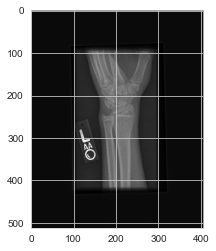

In [185]:
display_case(29439)

<AxesSubplot: xlabel='category', ylabel='count'>

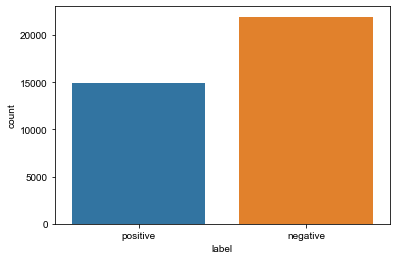

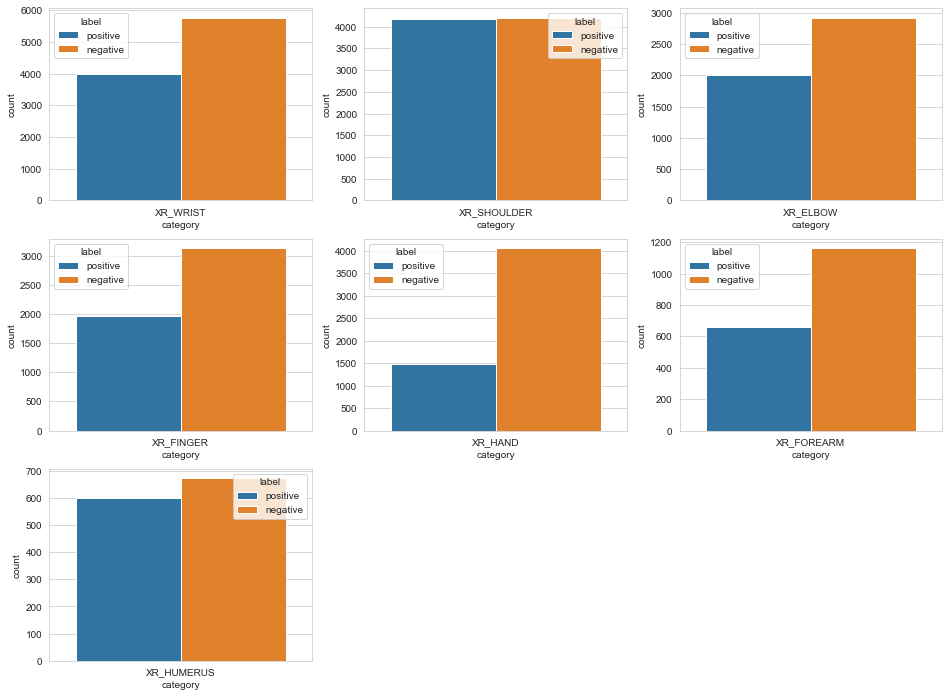

In [14]:
import seaborn as sns

sns.countplot(x='label',data=train_images_paths)

plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
wrist = train_images_paths[train_images_paths['category']=='XR_WRIST']
sns.countplot(x=wrist.category,data=wrist,hue='label')
plt.subplot(3,3,2)
shoulder = train_images_paths[train_images_paths['category']=='XR_SHOULDER']
sns.countplot(x=shoulder.category,data=shoulder,hue='label')
plt.subplot(3,3,3)
wrist = train_images_paths[train_images_paths['category']=='XR_ELBOW']
sns.countplot(x=wrist.category,data=wrist,hue='label')
plt.subplot(3,3,4)
wrist = train_images_paths[train_images_paths['category']=='XR_FINGER']
sns.countplot(x=wrist.category,data=wrist,hue='label')
plt.subplot(3,3,5)
wrist = train_images_paths[train_images_paths['category']=='XR_HAND']
sns.countplot(x=wrist.category,data=wrist,hue='label')
plt.subplot(3,3,6)
wrist = train_images_paths[train_images_paths['category']=='XR_FOREARM']
sns.countplot(x=wrist.category,data=wrist,hue='label')
plt.subplot(3,3,7)
wrist = train_images_paths[train_images_paths['category']=='XR_HUMERUS']
sns.countplot(x=wrist.category,data=wrist,hue='label')

## 2. Pre-processing

In [17]:
from skimage import io,filters


img_path = [i for i in '../'+train_images_paths['image_path']]
img1_path = img_path[36807]
img1 = io.imread(img1_path)

## Grayscale Image

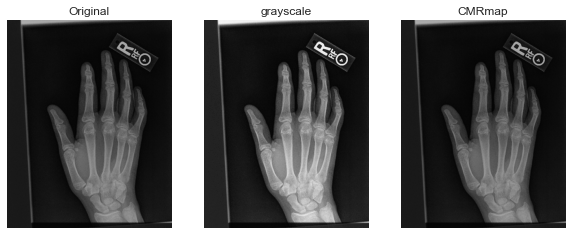

In [21]:
import cv2

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(img1)
axes[1].set_title("grayscale")
axes[1].imshow(gray, cmap="gray")
axes[2].set_title("CMRmap")
axes[2].imshow(img1, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

Convert DF to Gray Scale

In [183]:
gray_scale_preprocessed_data_withID = pd.DataFrame(columns=['image_path', 'preprocessed_image_path','category','patientId','lable'])
print(gray_scale_preprocessed_data_withID.shape)


def preprocess_images(image_paths, output_directory):
    # Create a new data frame to store the preprocessed image information
    print("Number of images to preprocess:", len(image_paths))  # Add this line

    for idx, image_path in enumerate(image_paths['image_path']):
        image_path = '../'+image_path
        try:
            # Read the image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Failed to read image: {image_path}")
                continue

            # Generate the preprocessed image path and save the image and appropriate path
            if image_paths['category'][idx] == 'XR_SHOULDER ' and image_paths['label'][idx] == 'positive':
                preprocessed_image_name = f'preprocessed_XR_SHOULDER{idx}_positive.jpg'
            elif image_paths['category'][idx] == 'XR_ELBOW' and image_paths['label'][idx] == 'positive':
                preprocessed_image_name = f'preprocessed_XR_ELBOW{idx}_positive.jpg'
            elif image_paths['category'][idx] == 'XR_HUMERUS' and image_paths['label'][idx] == 'positive':
                preprocessed_image_name = f'preprocessed_XR_HUMERUS{idx}_positive.jpg'
            elif image_paths['category'][idx] == 'XR_FINGER' and image_paths['label'][idx] == 'positive':
                preprocessed_image_name = f'preprocessed_XR_FINGER{idx}_positive.jpg'
            else:
                preprocessed_image_name = f"preprocessed{image_paths['category'][idx]}{idx}_negative.jpg"


            # Perform preprocessing 
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            preprocessed_image_path = os.path.join(output_directory, preprocessed_image_name)
            cv2.imwrite(preprocessed_image_path, gray)

            # Append the image paths to the data frame
            gray_scale_preprocessed_data_withID.loc[idx] = [image_path, preprocessed_image_path, image_paths['category'][idx], image_paths['label'][idx],image_paths['patientId'][idx]]

        except Exception as e:
            print(f"Error occurred while processing image: {image_path}")
            print(f"Error message: {str(e)}")

    # Save the preprocessed data frame as a CSV file
    gray_scale_preprocessed_data_withID.to_csv(os.path.join(output_directory, 'gray_scale_preprocessed_data_withID.csv'), index=False)

    print(f"Preprocessing completed. Preprocessed images saved in '{output_directory}'.")



(0, 5)


In [184]:
output_dir = '..\\Image_processing_keras\\preprocessed_data'
preprocess_images(train_images_paths, output_dir)




Number of images to preprocess: 36808
Preprocessing completed. Preprocessed images saved in '..\Image_processing_keras\preprocessed_data'.


In [153]:
train_images_paths.head()


,image_path,label,category,patientId
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,XR_SHOULDER,00001
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,XR_SHOULDER,00001
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,XR_SHOULDER,00001
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive,XR_SHOULDER,00002
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive,XR_SHOULDER,00002


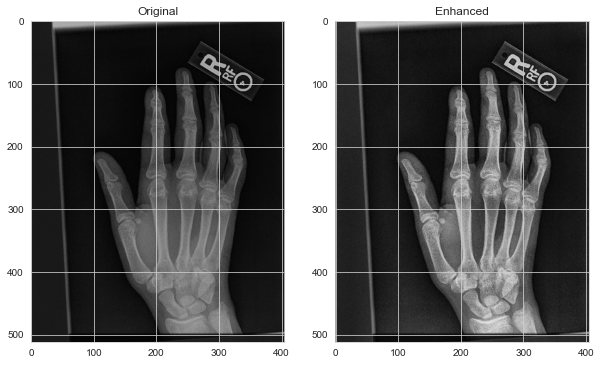

In [27]:
import skimage

# converting to LAB color space
lab= cv2.cvtColor(img1, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# convert to float to show image because CV2 store a numpy.ndarray
img2 = skimage.img_as_float(img1)

enh = skimage.img_as_float(enhanced_img)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(img2)
axes[1].set_title("Enhanced")
axes[1].imshow(enh)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Histogram equalization

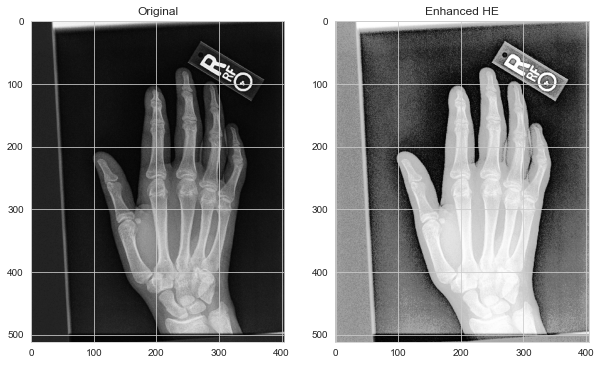

In [28]:
from skimage.exposure import equalize_hist

enhanced = equalize_hist(gray)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(gray, cmap='gray')
axes[1].set_title("Enhanced HE")
axes[1].imshow(enhanced, cmap='gray')

## Masking

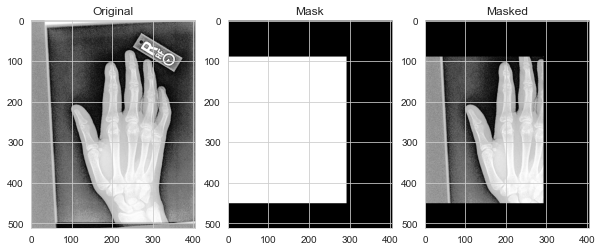

In [30]:
# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(enhanced.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(enhanced, enhanced, mask=mask)
# convert to float to show image because CV2 store a numpy.ndarray
img2 = skimage.img_as_float(enhanced)
ms = skimage.img_as_float(mask)
msk = skimage.img_as_float(masked)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(img2, cmap='gray')
axes[1].set_title("Mask")
axes[1].imshow(ms, cmap='gray')
axes[2].set_title("Masked")
axes[2].imshow(msk, cmap='gray')

cv2.waitKey(0)
cv2.destroyAllWindows()

## Gaussian Noise Removal
**Gaussian filter on the image blurs the image**

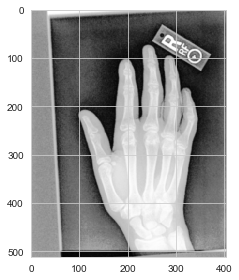

In [31]:
gaussian = filters.gaussian(enhanced)
io.imshow(gaussian)

## Laplace of Gaussian Edge Detection
**second spatial derivative**

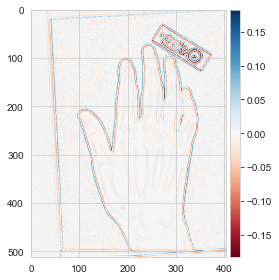

In [32]:
from scipy import ndimage

image_laplace_gaussian = ndimage.gaussian_laplace(gaussian, sigma=1)
io.imshow(image_laplace_gaussian)

## Sobel Edge Detection

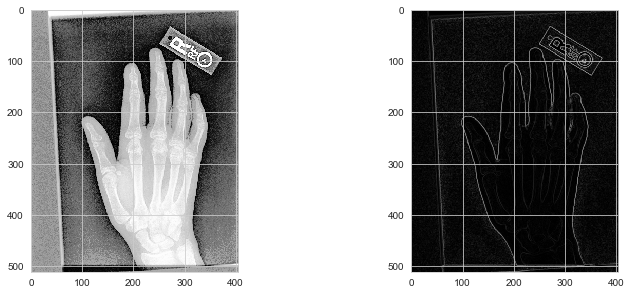

In [33]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
io.imshow(enhanced)

edges = filters.sobel(enhanced)
plt.subplot(3,3,2)
io.imshow(edges)

The data type -  float64


c:\Users\Hamad\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


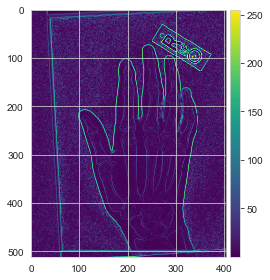

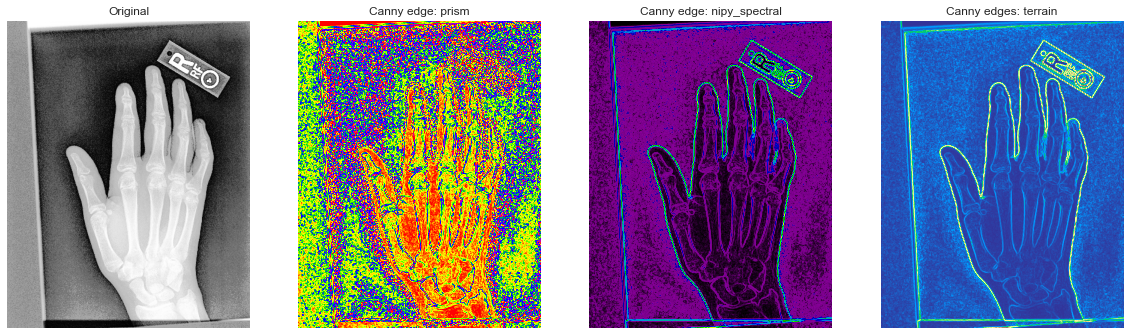

In [34]:
fourier_gaussian = ndimage.fourier_gaussian(enhanced, sigma=0.05)

x_prewitt = ndimage.prewitt(fourier_gaussian, axis=0)
y_prewitt = ndimage.prewitt(fourier_gaussian, axis=1)

image_canny = np.hypot(x_prewitt, y_prewitt)

image_canny *= 255.0 / np.max(image_canny)

print("The data type - ", image_canny.dtype)
io.imshow(image_canny)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))

axes[0].set_title("Original")
axes[0].imshow(enhanced, cmap="gray")
axes[1].set_title("Canny edge: prism")
axes[1].imshow(image_canny, cmap="prism")
axes[2].set_title("Canny edge: nipy_spectral")
axes[2].imshow(image_canny, cmap="nipy_spectral")
axes[3].set_title("Canny edges: terrain")
axes[3].imshow(image_canny, cmap="terrain")
for i in axes:
    i.axis("off")
plt.show()

## 3. Feature extraction

## SIFT key points

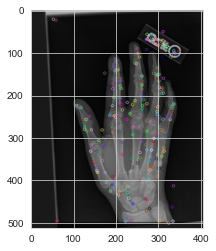

In [35]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(img1,None)
img=cv2.drawKeypoints(gray1,kp,img1)
plt.imshow(img)

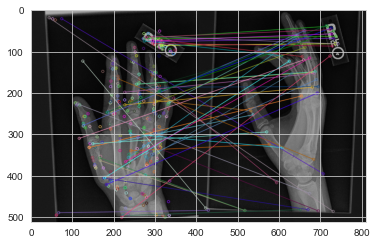

(<matplotlib.image.AxesImage at 0x1c808de98a0>, None)

In [36]:
img2_path = img_path[36806]
img2 = cv2.imread(img2_path) 


img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(des,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp, img2, kp2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

## HOG

(512, 405)


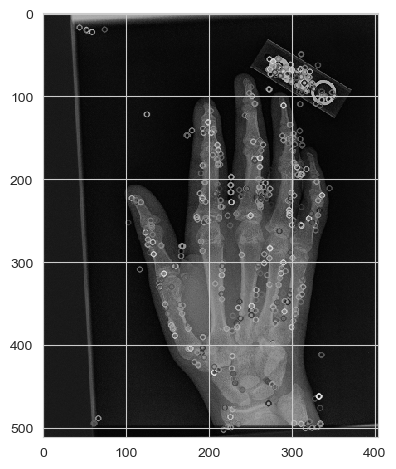

In [67]:
#importing required libraries
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

io.imshow(img1)
print(img1.shape)